In [1]:
import os
import librosa
import IPython
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchaudio.transforms as transforms
import torch.optim as optim

In [2]:
file_path = r"C:\Users\sharm\Python Projects\ML Projects\Bird CLEF\train_audio\abethr1\XC363501.ogg"
audio, sr = librosa.load(file_path)
print(audio)
print(audio.shape)
print(sr)
IPython.display.display(IPython.display.Audio(audio, rate = sr))

[ 1.06583661e-06  2.76369701e-06 -1.68077736e-06 ...  1.08640625e-05
  1.79703002e-05  0.00000000e+00]
(411841,)
22050


torch.Size([1, 128, 2060])


c:\Users\sharm\Python Projects\ML Projects\Cancer Instance Segmentation\.venv\Lib\site-packages\torchaudio\functional\functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


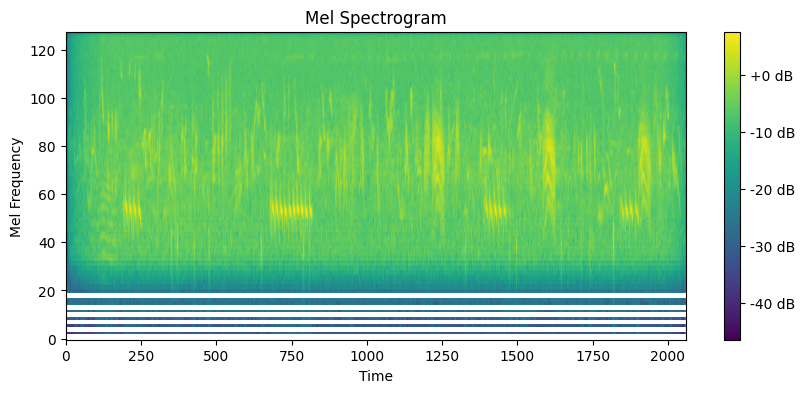

In [3]:
transform = transforms.MelSpectrogram(sample_rate=22050, n_mels=128)
audio_tensor = torch.tensor(audio, dtype = torch.float32)
audio_tensor = audio_tensor.unsqueeze(0)
spectrogram = transform(audio_tensor)
print(spectrogram.shape)
plt.figure(figsize=(10, 4))
plt.imshow(spectrogram.squeeze(0).log2(), aspect='auto', origin='lower')
plt.title("Mel Spectrogram")
plt.colorbar(format='%+2.0f dB')
plt.xlabel("Time")
plt.ylabel("Mel Frequency")
plt.show()

In [4]:
file_path = r"C:\Users\sharm\Python Projects\ML Projects\Bird CLEF\train_audio\afrgrp1\XC126604.ogg"
audio, sr = librosa.load(file_path)
print(audio)
print(audio.shape)
print(sr)
IPython.display.display(IPython.display.Audio(audio, rate = sr))

[-1.3491202e-05 -4.7232729e-06 -1.8721861e-05 ...  1.1014738e-03
  1.0933228e-03  0.0000000e+00]
(969409,)
22050


torch.Size([1, 128, 4848])


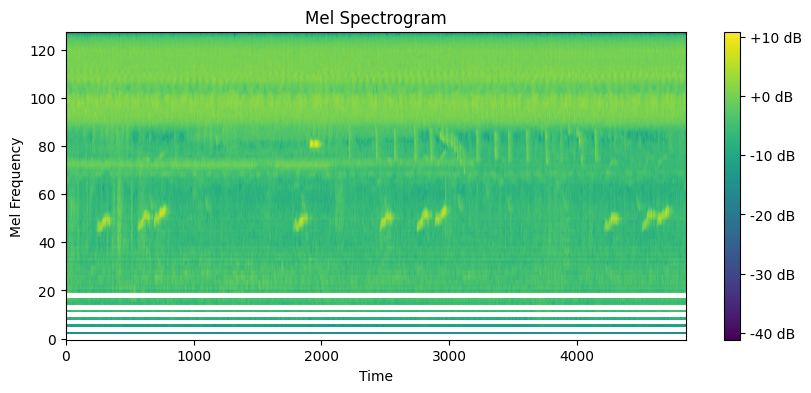

In [5]:
transform = transforms.MelSpectrogram(sample_rate=22050, n_mels=128)
audio_tensor = torch.tensor(audio, dtype = torch.float32)
audio_tensor = audio_tensor.unsqueeze(0)
spectrogram = transform(audio_tensor)
print(spectrogram.shape)
plt.figure(figsize=(10, 4))
plt.imshow(spectrogram.squeeze(0).log2(), aspect='auto', origin='lower')
plt.title("Mel Spectrogram")
plt.colorbar(format='%+2.0f dB')
plt.xlabel("Time")
plt.ylabel("Mel Frequency")
plt.show()

In [6]:
root_dir = r"C:\Users\sharm\Python Projects\ML Projects\Bird CLEF\train_audio"
ls = os.listdir(root_dir)
print(len(ls))
print(ls)

264
['abethr1', 'abhori1', 'abythr1', 'afbfly1', 'afdfly1', 'afecuc1', 'affeag1', 'afgfly1', 'afghor1', 'afmdov1', 'afpfly1', 'afpkin1', 'afpwag1', 'afrgos1', 'afrgrp1', 'afrjac1', 'afrthr1', 'amesun2', 'augbuz1', 'bagwea1', 'barswa', 'bawhor2', 'bawman1', 'bcbeat1', 'beasun2', 'bkctch1', 'bkfruw1', 'blacra1', 'blacuc1', 'blakit1', 'blaplo1', 'blbpuf2', 'blcapa2', 'blfbus1', 'blhgon1', 'blhher1', 'blksaw1', 'blnmou1', 'blnwea1', 'bltapa1', 'bltbar1', 'bltori1', 'blwlap1', 'brcale1', 'brcsta1', 'brctch1', 'brcwea1', 'brican1', 'brobab1', 'broman1', 'brosun1', 'brrwhe3', 'brtcha1', 'brubru1', 'brwwar1', 'bswdov1', 'btweye2', 'bubwar2', 'butapa1', 'cabgre1', 'carcha1', 'carwoo1', 'categr', 'ccbeat1', 'chespa1', 'chewea1', 'chibat1', 'chtapa3', 'chucis1', 'cibwar1', 'cohmar1', 'colsun2', 'combul2', 'combuz1', 'comsan', 'crefra2', 'crheag1', 'crohor1', 'darbar1', 'darter3', 'didcuc1', 'dotbar1', 'dutdov1', 'easmog1', 'eaywag1', 'edcsun3', 'egygoo', 'equaka1', 'eswdov1', 'eubeat1', 'fatrav1'

In [7]:
for idx in range(5):
    path = root_dir + "\\" + ls[idx]
    print(os.listdir(path))

['XC128013.ogg', 'XC363501.ogg', 'XC363502.ogg', 'XC363503.ogg', 'XC363504.ogg', 'XC379322.ogg', 'XC432639.ogg', 'XC467121.ogg', 'XC467122.ogg', 'XC531557.ogg', 'XC585802.ogg', 'XC606253.ogg', 'XC616997.ogg', 'XC639039.ogg', 'XC756300.ogg']
['XC120250.ogg', 'XC120251.ogg', 'XC127317.ogg', 'XC127318.ogg', 'XC128202.ogg', 'XC132733.ogg', 'XC138433.ogg', 'XC153687.ogg', 'XC153688.ogg', 'XC153689.ogg', 'XC153690.ogg', 'XC186252.ogg', 'XC188925.ogg', 'XC195537.ogg', 'XC196120.ogg', 'XC196760.ogg', 'XC196761.ogg', 'XC200588.ogg', 'XC200793.ogg', 'XC200797.ogg', 'XC200798.ogg', 'XC201222.ogg', 'XC205393.ogg', 'XC206017.ogg', 'XC239946.ogg', 'XC240626.ogg', 'XC247347.ogg', 'XC247348.ogg', 'XC247350.ogg', 'XC247351.ogg', 'XC247353.ogg', 'XC255209.ogg', 'XC268630.ogg', 'XC288640.ogg', 'XC294766.ogg', 'XC307329.ogg', 'XC316920.ogg', 'XC323330.ogg', 'XC329476.ogg', 'XC331499.ogg', 'XC332545.ogg', 'XC348440.ogg', 'XC354453.ogg', 'XC356234.ogg', 'XC361351.ogg', 'XC364300.ogg', 'XC368179.ogg', 'XC377

In [8]:
total = 0
for idx in range(len(ls)):
    path = root_dir + "\\" + ls[idx]
    num = len(os.listdir(path))
    total += num
print(total)

16941


In [9]:
df = {}

for idx in range(len(ls)):
    path = root_dir + "\\" + ls[idx]
    files = os.listdir(path)
    for file in files:
        df[file] = ls[idx]

print(len(df))
print(df)

16940
{'XC128013.ogg': 'abethr1', 'XC363501.ogg': 'abethr1', 'XC363502.ogg': 'abethr1', 'XC363503.ogg': 'abethr1', 'XC363504.ogg': 'abethr1', 'XC379322.ogg': 'abethr1', 'XC432639.ogg': 'abethr1', 'XC467121.ogg': 'abethr1', 'XC467122.ogg': 'abethr1', 'XC531557.ogg': 'abethr1', 'XC585802.ogg': 'abethr1', 'XC606253.ogg': 'abethr1', 'XC616997.ogg': 'abethr1', 'XC639039.ogg': 'abethr1', 'XC756300.ogg': 'abethr1', 'XC120250.ogg': 'abhori1', 'XC120251.ogg': 'abhori1', 'XC127317.ogg': 'abhori1', 'XC127318.ogg': 'abhori1', 'XC128202.ogg': 'abhori1', 'XC132733.ogg': 'abhori1', 'XC138433.ogg': 'abhori1', 'XC153687.ogg': 'abhori1', 'XC153688.ogg': 'abhori1', 'XC153689.ogg': 'abhori1', 'XC153690.ogg': 'abhori1', 'XC186252.ogg': 'abhori1', 'XC188925.ogg': 'abhori1', 'XC195537.ogg': 'abhori1', 'XC196120.ogg': 'abhori1', 'XC196760.ogg': 'abhori1', 'XC196761.ogg': 'abhori1', 'XC200588.ogg': 'abhori1', 'XC200793.ogg': 'abhori1', 'XC200797.ogg': 'abhori1', 'XC200798.ogg': 'abhori1', 'XC201222.ogg': 'abho

In [10]:
df = pd.DataFrame(list(df.items()), columns=['sound file', 'class'])
df

sound file    class
0      XC128013.ogg  abethr1
1      XC363501.ogg  abethr1
2      XC363502.ogg  abethr1
3      XC363503.ogg  abethr1
4      XC363504.ogg  abethr1
...             ...      ...
16935  XC703472.ogg  yewgre1
16936  XC703485.ogg  yewgre1
16937  XC704433.ogg  yewgre1
16938  XC752974.ogg  yewgre1
16939  XC753190.ogg  yewgre1

[16940 rows x 2 columns]

In [11]:
df['class'].value_counts().values

array([500, 500, 500, 500, 500, 486, 477, 437, 436, 425, 378, 293, 281,
       262, 252, 239, 227, 199, 181, 172, 166, 166, 161, 153, 152, 138,
       137, 136, 134, 132, 129, 126, 122, 121, 119, 116, 112, 109, 109,
       108, 106, 105, 104, 103,  98,  97,  94,  94,  91,  90,  90,  88,
        81,  81,  81,  81,  79,  79,  78,  78,  76,  75,  73,  72,  72,
        72,  70,  68,  68,  67,  67,  63,  62,  60,  59,  59,  59,  57,
        56,  56,  53,  52,  51,  51,  50,  49,  48,  48,  48,  47,  47,
        46,  45,  45,  45,  44,  43,  43,  42,  42,  41,  40,  40,  40,
        38,  38,  37,  37,  37,  36,  36,  35,  34,  34,  34,  34,  34,
        34,  34,  33,  33,  33,  32,  32,  32,  31,  30,  30,  30,  30,
        30,  30,  29,  29,  29,  29,  28,  28,  28,  28,  28,  28,  27,
        27,  27,  27,  26,  26,  25,  25,  25,  25,  24,  24,  24,  23,
        23,  23,  22,  22,  22,  22,  22,  22,  21,  21,  21,  21,  21,
        20,  20,  20,  20,  20,  19,  19,  19,  19,  19,  18,  1

In [12]:
dummies = pd.get_dummies(df['class'], prefix="class")
df = pd.concat([df, dummies], axis = 1)
df

sound file    class  class_abethr1  class_abhori1  class_abythr1  \
0      XC128013.ogg  abethr1           True          False          False   
1      XC363501.ogg  abethr1           True          False          False   
2      XC363502.ogg  abethr1           True          False          False   
3      XC363503.ogg  abethr1           True          False          False   
4      XC363504.ogg  abethr1           True          False          False   
...             ...      ...            ...            ...            ...   
16935  XC703472.ogg  yewgre1          False          False          False   
16936  XC703485.ogg  yewgre1          False          False          False   
16937  XC704433.ogg  yewgre1          False          False          False   
16938  XC752974.ogg  yewgre1          False          False          False   
16939  XC753190.ogg  yewgre1          False          False          False   

       class_afbfly1  class_afdfly1  class_afecuc1  class_affeag1  \
0              False          False          False          False   
1              False          False          False          False   
2              False          False          False          False   
3              False          False          False          False   
4              False          False          False          False   
...              ...            ...            ...            ...   
16935          False          False          False          False   
16936          False          False          False          False   
16937          False          False          False          False   
16938          False          False          False          False   
16939          False          False          False          False   

       class_afgfly1  ...  class_yebsto1  class_yeccan1  class_yefcan  \
0              False  ...          False          False         False   
1              False  ...          False          False         False   
2              False  ...          False          False         False   
3              False  ...          False          False         False   
4              False  ...          False          False         False   
...              ...  ...            ...            ...           ...   
16935          False  ...          False          False         False   
16936          False  ...          False          False         False   
16937          False  ...          False          False         False   
16938          False  ...          False          False         False   
16939          False  ...          False          False         False   

       class_yelbis1  class_yenspu1  class_yertin1  class_yesbar1  \
0              False          False          False          False   
1              False          False          False          False   
2              False          False          False          False   
3              False          False          False          False   
4              False          False          False          False   
...              ...            ...            ...            ...   
16935          False          False          False          False   
16936          False          False          False          False   
16937          False          False          False          False   
16938          False          False          False          False   
16939          False          False          False          False   

       class_yespet1  class_yetgre1  class_yewgre1  
0              False          False          False  
1              False          False          False  
2              False          False          False  
3              False          False          False  
4              False          False          False  
...              ...            ...            ...  
16935          False          False           True  
16936          False          False           True  
16937          False          False           True  
16938          Fals

In [13]:
class AudioDataset(Dataset):
    def __init__(self, root : str, df : pd.DataFrame, transform = None, target_transform = None, max_len : int = None):
        super(AudioDataset, self).__init__()
        self.root = root
        self.df = df
        self.transform = transform
        self.target_transform = target_transform
        self.max_len = max_len

    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        file_name = row[0]
        dir_name = row[1]

        file_path = self.root + '\\' + dir_name + '\\' + file_name
        audio, sr = librosa.load(file_path)
        audio_tensor = torch.tensor(audio, dtype = torch.float32)
        audio_tensor = audio_tensor.unsqueeze(0)

        if self.transform:
            audio_tensor = self.transform(audio_tensor)

        if self.max_len:
            audio_tensor = self.pad_spectrogram(audio_tensor)

        label_tensor = torch.tensor(row[2:])

        if self.target_transform:
            label_tensor = self.target_transform(label_tensor)

        return audio_tensor, label_tensor.int()
    
    def pad_spectrogram(self, spectrogram):
        pad_length = self.max_len - spectrogram.size(2)

        if pad_length > 0:
            spectrogram = F.pad(spectrogram, (0, pad_length), mode = "constant", value = 0)

        elif pad_length < 0:
            spectrogram = spectrogram[:, :, :self.max_len]

        return spectrogram


In [14]:
df = df[:1000]

In [15]:
train_df, val_df = train_test_split(df, test_size=0.2)
print(len(train_df), len(val_df))

800 200


In [16]:
root_dir = r"C:\Users\sharm\Python Projects\ML Projects\Bird CLEF\train_audio"
transform = transforms.MelSpectrogram(sample_rate=22050, n_mels=128)
max_len = 300
train_dataset = AudioDataset(root = root_dir, df = train_df, transform = transform, max_len = 3000)
val_dataset = AudioDataset(root = root_dir, df = val_df, transform = transform, max_len = 3000)

print(len(train_dataset), len(val_dataset))

800 200


c:\Users\sharm\Python Projects\ML Projects\Cancer Instance Segmentation\.venv\Lib\site-packages\torchaudio\functional\functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


In [17]:
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size = batch_size, shuffle = True)
specs, labels = next(iter(train_loader))
print(specs.shape, labels.shape)

C:\Users\sharm\AppData\Local\Temp\ipykernel_18728\949889125.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  file_name = row[0]
C:\Users\sharm\AppData\Local\Temp\ipykernel_18728\949889125.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dir_name = row[1]
C:\Users\sharm\AppData\Local\Temp\ipykernel_18728\949889125.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_tensor = torch.tensor(row[2:])
C:\Users\sharm\AppData\

torch.Size([32, 1, 128, 3000]) torch.Size([32, 264])


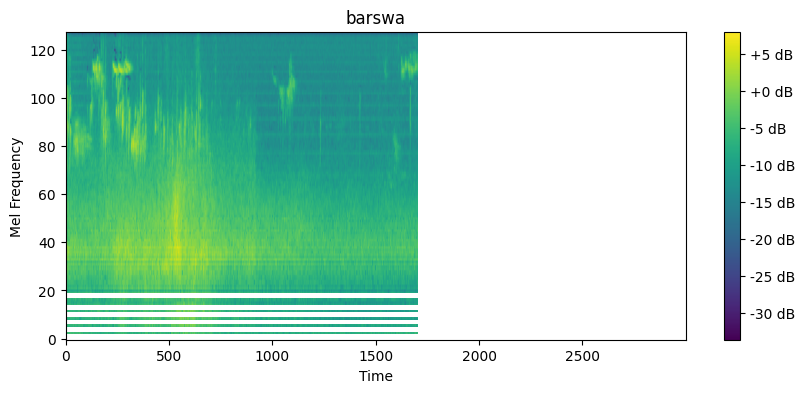

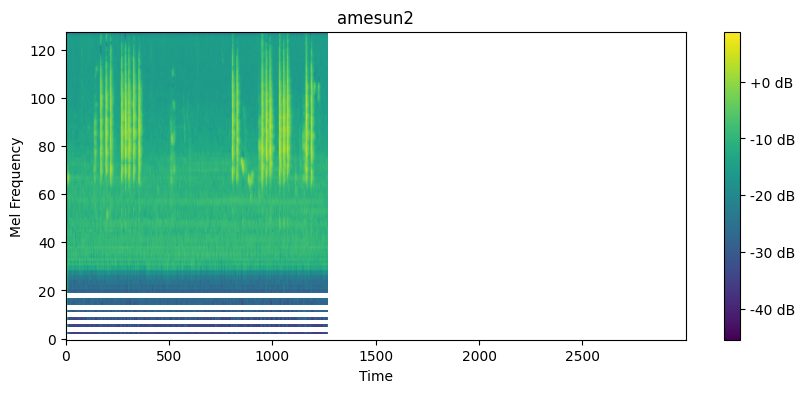

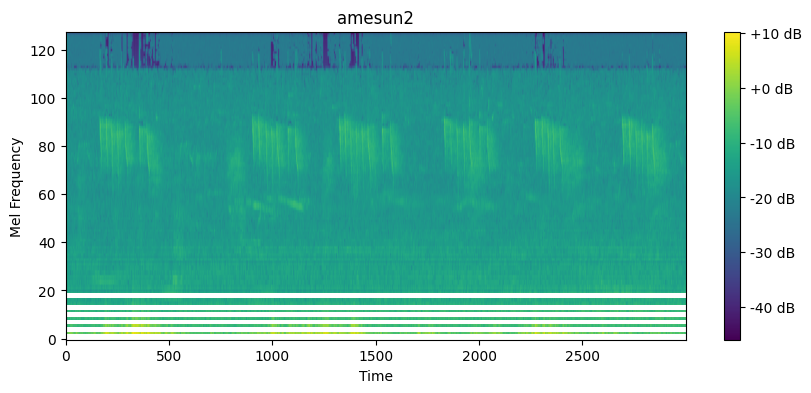

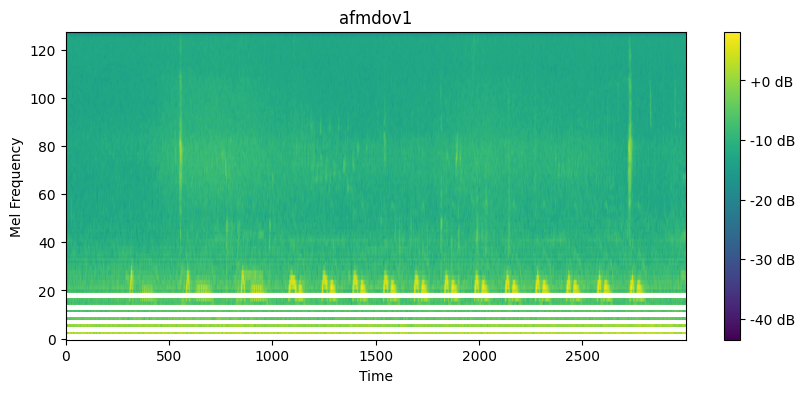

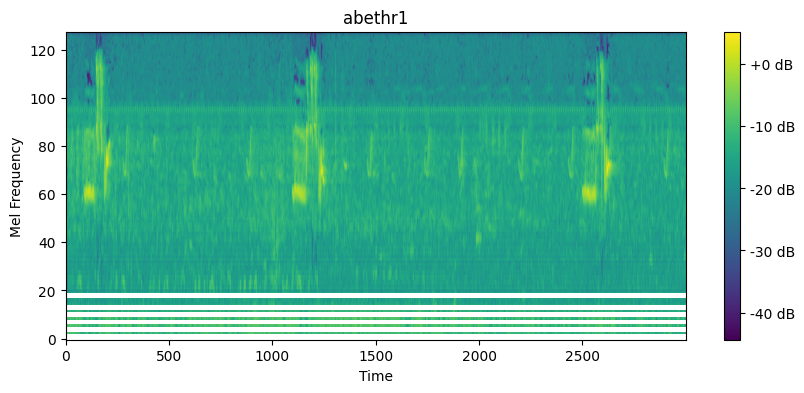

In [18]:
for idx, (spec, label) in enumerate(zip(specs, labels)):
    if idx >= 5:
        break
    plt.figure(figsize=(10, 4))
    plt.imshow(spec.squeeze(0).log2(), aspect='auto', origin='lower')
    plt.title(train_dataset.df.columns[2+torch.argmax(label, dim = 0).item()][6:])
    plt.colorbar(format='%+2.0f dB')
    plt.xlabel("Time")
    plt.ylabel("Mel Frequency")
    plt.show()
    

In [19]:
class AudioCNN(nn.Module):
    def __init__(self, num_classes):
        super(AudioCNN, self).__init__()
        self.block1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=(3, 3), stride=(1, 1), padding="same"),
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), stride=(1, 1), padding="same"),
            nn.BatchNorm2d(16),
            nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
        )

        self.block2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3, 3), stride=(1, 1), padding="same"),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(3, 3), stride=(1, 1), padding="same"),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
        )

        self.block3 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3), stride=(1, 1), padding="same"),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), stride=(1, 1), padding="same"),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), stride=(1, 1), padding="same"),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
        )

        self.block4 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3, 3), stride = (1, 1), padding="same"),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), stride = (1, 1), padding="same"),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=(3, 3), stride = (1, 1), padding="same"),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
        )

        self.block5 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(3, 3), stride = (1, 1), padding="same"),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(3, 3), stride = (1, 1), padding="same"),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=(3, 3), stride = (1, 1), padding="same"),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
        )

        self.flatten = nn.Flatten()
        self.block6 = nn.Sequential(
            nn.Linear(in_features=256*4*93, out_features=512),
            nn.Dropout(0.5),
            nn.ReLU(),
            nn.Linear(in_features=512, out_features=num_classes)
        )
    
    def forward(self, x):
        x = F.relu(self.block1(x))
        x = F.relu(self.block2(x))
        x = F.relu(self.block3(x))
        x = F.relu(self.block4(x))
        x = F.relu(self.block5(x))
        x = self.flatten(x)
        x = self.block6(x)
        return x

In [20]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [21]:
num_classes = 264
model = AudioCNN(num_classes=num_classes).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(params = model.parameters(), lr = 0.002)
num_epochs = 60

In [22]:
def train(model, train_loader, val_loader, criterion, optimizer, num_epochs, device):
    train_loss_history = []
    val_loss_history = []
    train_acc_history = []
    val_acc_history = []

    for epoch in range(num_epochs):
        model.train()
        running_train_loss = 0
        running_corrects_train = 0
        total_train = 0

        for batch_idx, (specs, labels) in enumerate(train_loader):
            #print(f'{batch_idx+1}/{len(train_loader)}')
            specs, labels = specs.to(device), labels.to(dtype=torch.float32).to(device)
            outputs = model(specs)
            optimizer.zero_grad()
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item()

            _, preds = torch.max(outputs, 1)
            _, labels_max = torch.max(labels, 1)
            running_corrects_train += torch.sum(preds == labels_max).item()
            total_train += labels.size(0)

        epoch_train_loss = running_train_loss / len(train_loader)
        train_loss_history.append(epoch_train_loss)
        train_acc = running_corrects_train / total_train
        train_acc_history.append(train_acc)

        model.eval()
        running_val_loss = 0
        running_corrects_val = 0
        total_val = 0

        with torch.no_grad():
            for batch_idx, (specs, labels) in enumerate(val_loader):
                #print(f'{batch_idx+1}/{len(val_loader)}')
                specs, labels = specs.to(device), labels.to(dtype=torch.float32).to(device)
                outputs = model(specs)
                loss = criterion(outputs, labels)
                running_val_loss += loss.item()

                _, preds = torch.max(outputs, 1)
                _, labels_max = torch.max(labels, 1)
                running_corrects_val += torch.sum(preds == labels_max).item()
                total_val += labels.size(0)

        epoch_val_loss = running_val_loss / len(val_loader)
        val_loss_history.append(epoch_val_loss)
        val_acc = running_corrects_val / total_val
        val_acc_history.append(val_acc)

        print(f'Epoch {epoch+1}/{num_epochs} ---> Training Loss : {epoch_train_loss}, Validation Loss : {epoch_val_loss}, Training Accuracy: {train_acc}, Validation Accuracy: {val_acc}')

    plt.figure(figsize=(10, 4))
    plt.plot(train_loss_history, color='b', label='Training Loss')
    plt.plot(val_loss_history, color='r', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 4))
    plt.plot(train_acc_history, color='b', label='Training Accuracy')
    plt.plot(val_acc_history, color='r', label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
   

C:\Users\sharm\AppData\Local\Temp\ipykernel_18728\949889125.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  file_name = row[0]
C:\Users\sharm\AppData\Local\Temp\ipykernel_18728\949889125.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dir_name = row[1]
C:\Users\sharm\AppData\Local\Temp\ipykernel_18728\949889125.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_tensor = torch.tensor(row[2:])
C:\Users\sharm\AppData\

Epoch 1/60 ---> Training Loss : 0.17531611755490303, Validation Loss : 0.10206156543322972, Training Accuracy: 0.07875, Validation Accuracy: 0.15
Epoch 2/60 ---> Training Loss : 0.0363001898676157, Validation Loss : 0.018783957564405034, Training Accuracy: 0.10875, Validation Accuracy: 0.175
Epoch 3/60 ---> Training Loss : 0.023721944838762284, Validation Loss : 0.029731499031186104, Training Accuracy: 0.1725, Validation Accuracy: 0.21
Epoch 4/60 ---> Training Loss : 0.022156815305352212, Validation Loss : 0.016968465011034693, Training Accuracy: 0.14375, Validation Accuracy: 0.165
Epoch 5/60 ---> Training Loss : 0.017240968197584153, Validation Loss : 0.0167474060186318, Training Accuracy: 0.1675, Validation Accuracy: 0.145
Epoch 6/60 ---> Training Loss : 0.01567382652312517, Validation Loss : 0.015132302950535501, Training Accuracy: 0.1975, Validation Accuracy: 0.185
Epoch 7/60 ---> Training Loss : 0.014689615964889526, Validation Loss : 0.01540594787469932, Training Accuracy: 0.225,

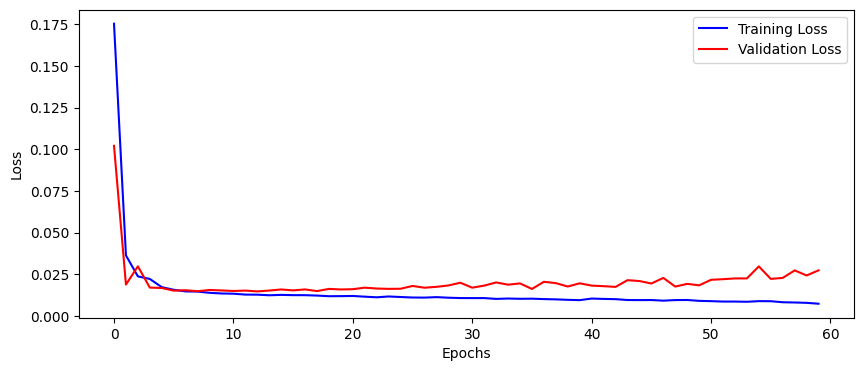

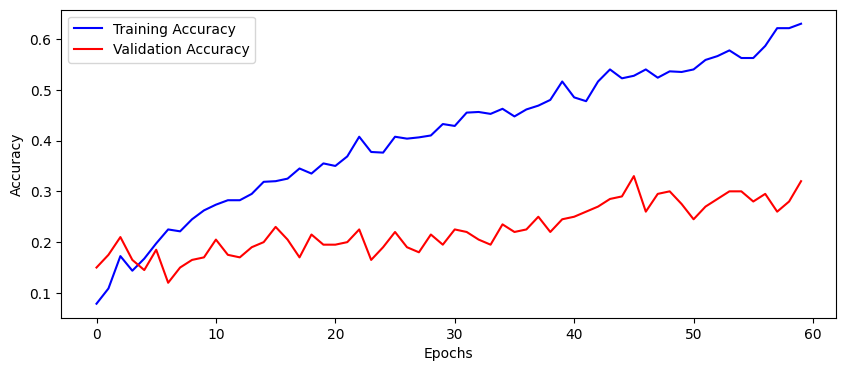

In [23]:
train(model, train_loader, val_loader, criterion, optimizer, num_epochs, device)

In [25]:
model_path = r"C:\Users\sharm\Python Projects\ML Projects\Bird CLEF\nano_model.pth"
torch.save(model, model_path)
